<a href="https://colab.research.google.com/github/Elma-dev/Udemy_courses_Analyses/blob/main/Udemy_courses_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
plt.figure(figsize=(13,5))

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

#<center>**Load Data**</center>

In [2]:
udemy_data=pd.read_csv("udemy_courses-raw.csv")

In [3]:
udemy_data.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2980,835712,Crash Course - Learn to Create a PHP MVC Frame...,https://www.udemy.com/crash-course-learn-to-cr...,True,50,1282,117,12,All Levels,1.000000,2016-05-01T18:04:29Z,Web Development
1886,854696,Instant Harmonica - play Amazing Grace + Ode t...,https://www.udemy.com/instant-harmonica-play-a...,True,40,341,7,23,All Levels,1.500000,2016-06-17T07:57:27Z,Musical Instruments
1142,174790,Accounting 102: Guide to Business Accounting,https://www.udemy.com/accounting-skills-a-busi...,True,50,1280,1,27,Intermediate Level,8.500000,2014-05-09T09:48:53Z,Business Finance
743,575476,Forex trading made simple,https://www.udemy.com/forex-mentor-online-school/,True,100,45,4,31,All Levels,1.500000,2015-09-25T19:08:09Z,Business Finance
1290,1047508,Make yourself a Santa Claus: Photoshop Manipul...,https://www.udemy.com/make-your-self-a-santa-c...,False,0,2665,20,8,All Levels,0.566667,2016-12-22T17:10:35Z,Graphic Design


In [4]:
udemy_data=udemy_data.drop(['course_id','course_title','url'],axis=1)
udemy_data

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...
3673,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [5]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_paid              3678 non-null   bool   
 1   price                3678 non-null   int64  
 2   num_subscribers      3678 non-null   int64  
 3   num_reviews          3678 non-null   int64  
 4   num_lectures         3678 non-null   int64  
 5   level                3678 non-null   object 
 6   content_duration     3678 non-null   float64
 7   published_timestamp  3678 non-null   object 
 8   subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 233.6+ KB


In [37]:
udemy_data.published_timestamp  =pd.to_datetime(udemy_data.published_timestamp)

#<center>**Analyse**</center>

## <center>**Is_Paide**</center>

In [6]:
#is_paid feature
px.pie(data_frame=udemy_data.groupby('is_paid').count().reset_index(),names='is_paid',values='price',title='Paid Vs notPaid')

## <center>**Subject**</center>

In [7]:
px.bar(data_frame=udemy_data,x='subject')

In [8]:
#number of subscribers in each subject
sub_num_sub=udemy_data.groupby('subject').num_subscribers.sum().to_frame().reset_index()
px.bar(data_frame=sub_num_sub,x='subject',y='num_subscribers')

In [9]:
paid_subject=udemy_data.groupby(['is_paid','subject']).num_subscribers.sum().to_frame().reset_index()
paid_subject

,is_paid,subject,num_subscribers
0,False,Business Finance,603228
1,False,Graphic Design,284821
2,False,Musical Instruments,304735
3,False,Web Development,2382741
4,True,Business Finance,1265483
5,True,Graphic Design,778327
6,True,Musical Instruments,541954
7,True,Web Development,5597831


In [10]:
px.bar(data_frame=paid_subject,x='subject',y='num_subscribers',color='is_paid')

In [11]:
sub_level=udemy_data.groupby(['subject','level']).sum().reset_index()
sub_level
px.bar(data_frame=sub_level,x='subject',y='num_subscribers',color='level')

<ipython-input-11-69ef472b363f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [12]:
sub_rev=udemy_data.groupby('subject').num_reviews.sum().to_frame().reset_index()
px.pie(data_frame=sub_rev,names='subject',values='num_reviews')

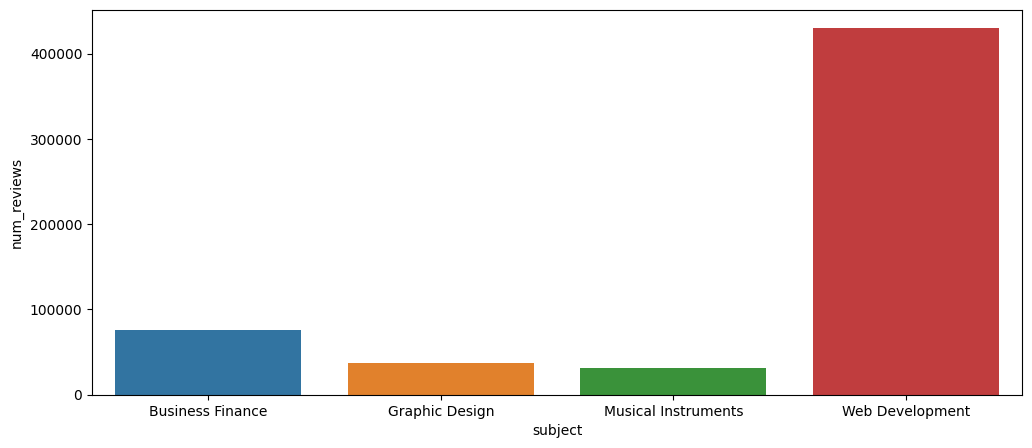

In [13]:
#number of reviews in each subject ???
plt.figure(figsize=(12,5))
sub_numR=udemy_data.groupby('subject').num_reviews.sum().to_frame().reset_index()
sns.barplot(data=sub_numR,x='subject',y='num_reviews')
plt.show()

In [32]:
pd.to_datetime(date_subject.published_timestamp).dt.year

0       2017
1       2017
2       2016
3       2017
4       2016
        ... 
3673    2016
3674    2017
3675    2015
3676    2016
3677    2014
Name: published_timestamp, Length: 3678, dtype: int64

In [38]:
date_subject=udemy_data[['subject','published_timestamp','price']]
date_subject.loc[:,'year']=date_subject.published_timestamp.dt.year

<ipython-input-38-54f5e36e4990>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
date_subject

,subject,published_timestamp,price,year
0,Business Finance,2017-01-18 20:58:58+00:00,200,2017
1,Business Finance,2017-03-09 16:34:20+00:00,75,2017
2,Business Finance,2016-12-19 19:26:30+00:00,45,2016
3,Business Finance,2017-05-30 20:07:24+00:00,95,2017
4,Business Finance,2016-12-13 14:57:18+00:00,200,2016
...,...,...,...,...
3673,Web Development,2016-06-14 17:36:46+00:00,100,2016
3674,Web Development,2017-03-10 22:24:30+00:00,25,2017
3675,Web Development,2015-12-30 16:41:42+00:00,40,2015
3676,Web Development,2016-08-11 19:06:15+00:00,50,2016


In [53]:
dateVssubject=date_subject.groupby(['subject','year']).price.sum().to_frame().reset_index()
dateVssubject.head()

,subject,year,price
0,Business Finance,2012,255
1,Business Finance,2013,3825
2,Business Finance,2014,10205
3,Business Finance,2015,23100
4,Business Finance,2016,25450


In [52]:

px.area(data_frame=dateVssubject,x='year',y='price',color='subject',
        labels={
          'price':'count'
        }
)

In [39]:
subject_reward=udemy_data[udemy_data.is_paid==True].groupby('subject').price.sum().to_frame().reset_index()
px.bar(data_frame=subject_reward,x='subject',y='price',text_auto='.2s',
       labels={
           'price':'reward'
       }
)

##<center>**Years**</center>

In [40]:
#price_years
price_years=udemy_data[['price','published_timestamp','subject']]
price_years['year']=udemy_data['published_timestamp'].dt.year
priceVsYear=price_years.groupby('year').agg('sum').reset_index()
px.line(data_frame=priceVsYear,x='year',y='price',text='price',
        labels={
            'price':'reward'
            }
        )

<ipython-input-40-07410302f0e1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-07410302f0e1>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [55]:
sub_year_price=price_years.groupby(['subject','year']).agg('sum').reset_index()
px.line(data_frame=sub_year_price,color='subject',y='price',text='year',labels={"index":""},title="Price Vs Subjects in each Year")

<ipython-input-55-018d367d61b2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## <center>**Correlation With Price**</center>

In [59]:
udemy_data.corr()

<ipython-input-59-c4e5e7dd82df>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


<ipython-input-62-d5ea5843bf87>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



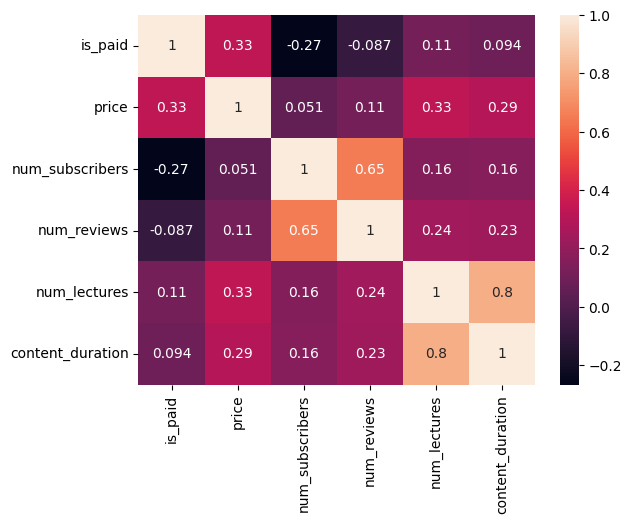

In [62]:
sns.heatmap(udemy_data.corr(),annot=True)
plt.show()

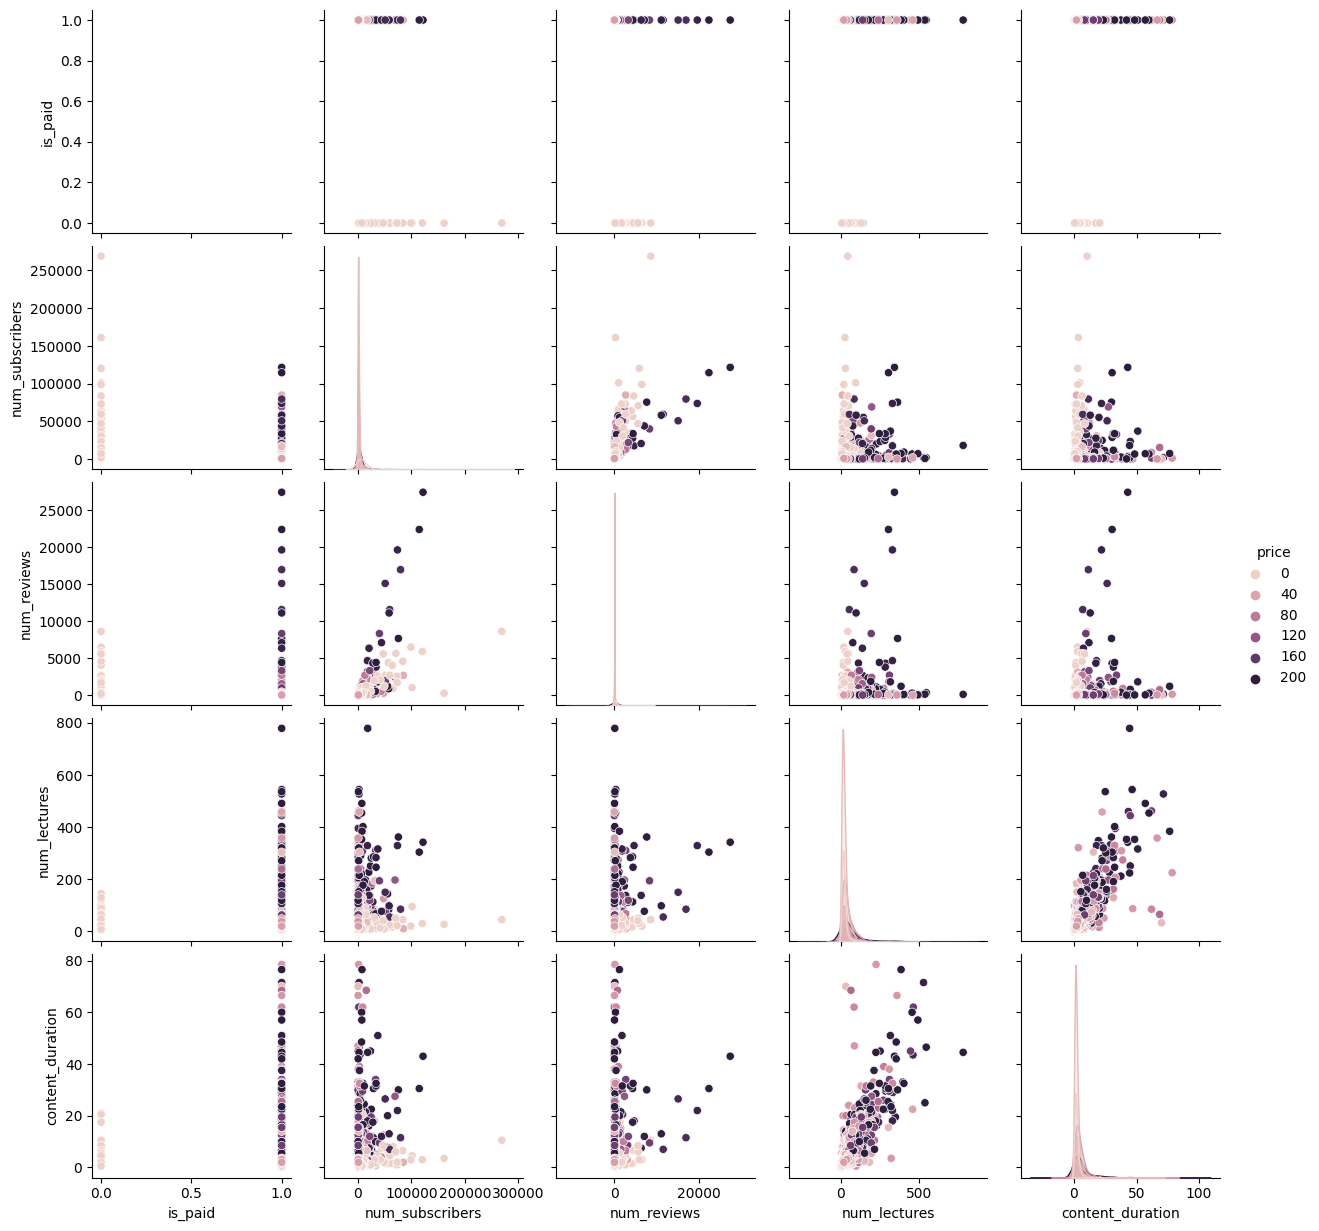

In [70]:
sns.pairplot(data=udemy_data,hue='price')